# Relatório de Análise 7

## Criando agrupamentos

In [55]:
import pandas as pd

In [56]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [57]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Tipo agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento,Apartamento
6,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0,17.59,Apartamento,Apartamento
7,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento,Apartamento
8,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento,Apartamento
9,Apartamento,Olaria,3,1,0,68,1000.0,670.0,0.0,14.71,Apartamento,Apartamento


In [58]:
dados['Valor'].mean()

3465.402299430185

In [59]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]# 

In [60]:
dados['Bairro'].drop_duplicates()

5           Copacabana
7      Barra da Tijuca
8               Tijuca
11             Ipanema
14            Botafogo
17              Leblon
105           Flamengo
Name: Bairro, dtype: object

In [61]:
grupo_bairro = dados.groupby('Bairro')

In [62]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [63]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    7,    13,    19,    21,    24,    31,    44,    47,    51,
                56,
             ...
             18776, 18777, 18778, 18779, 18780, 18781, 18783, 18784, 19392,
             19795],
            dtype='int64', length=3383),
 'Botafogo': Int64Index([   14,    35,    66,    67,    85,    91,    96,   102,   147,
               151,
             ...
             19739, 19743, 19768, 19796, 19800, 19803, 19809, 19812, 19816,
             19817],
            dtype='int64', length=849),
 'Copacabana': Int64Index([    5,    15,    20,    69,    78,    83,    97,   107,   108,
               109,
             ...
             19777, 19784, 19787, 19788, 19794, 19797, 19805, 19823, 19825,
             19829],
            dtype='int64', length=2445),
 'Flamengo': Int64Index([  105,   165,   215,   239,   256,   264,   268,   276,   319,
               323,
             ...
             19774, 19778, 19789, 19793, 19798, 19813, 19814, 19815, 19821,
  

In [64]:
for bairro, dados in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [65]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 5500.497783032811
Botafogo -> 3375.4605418138985
Copacabana -> 3351.519427402863
Flamengo -> 3220.119266055046
Ipanema -> 5451.549307253464
Leblon -> 5661.45393258427
Tijuca -> 1999.9380127620784


In [66]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,5500.50,3588.23
Botafogo,3375.46,939.98
Copacabana,3351.52,1039.22
Flamengo,3220.12,933.88
Ipanema,5451.55,1674.58
Leblon,5661.45,1617.80
Tijuca,1999.94,713.43


In [67]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3383.0,5500.50,5123.02,800.0,2400.0,3700.0,6700.0,32000.0
Botafogo,849.0,3375.46,2015.90,700.0,2200.0,3000.0,4250.0,22000.0
Copacabana,2445.0,3351.52,1904.58,100.0,1915.0,2900.0,4200.0,9900.0
Flamengo,654.0,3220.12,1958.30,800.0,1800.0,2700.0,4000.0,9500.0
Ipanema,1227.0,5451.55,2093.76,1200.0,3759.0,5500.0,7000.0,9900.0
Leblon,890.0,5661.45,2746.71,100.0,3900.0,5000.0,7000.0,30000.0
Tijuca,1097.0,1999.94,1039.67,750.0,1500.0,1800.0,2300.0,19000.0


In [68]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,32000.0,18608184.0
Botafogo,700.0,22000.0,2865766.0
Copacabana,100.0,9900.0,8194465.0
Flamengo,800.0,9500.0,2105958.0
Ipanema,1200.0,9900.0,6689051.0
Leblon,100.0,30000.0,5038694.0
Tijuca,750.0,19000.0,2193932.0


In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor médio do Aluguel por Bairro')

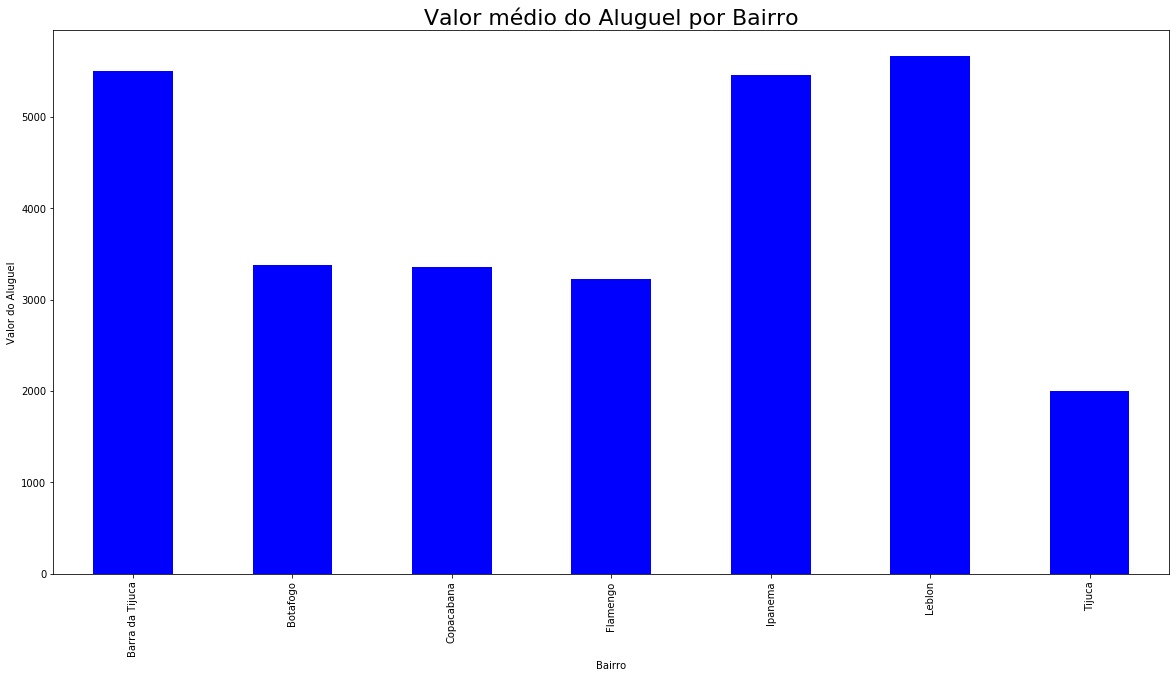

In [70]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'Blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor médio do Aluguel por Bairro')

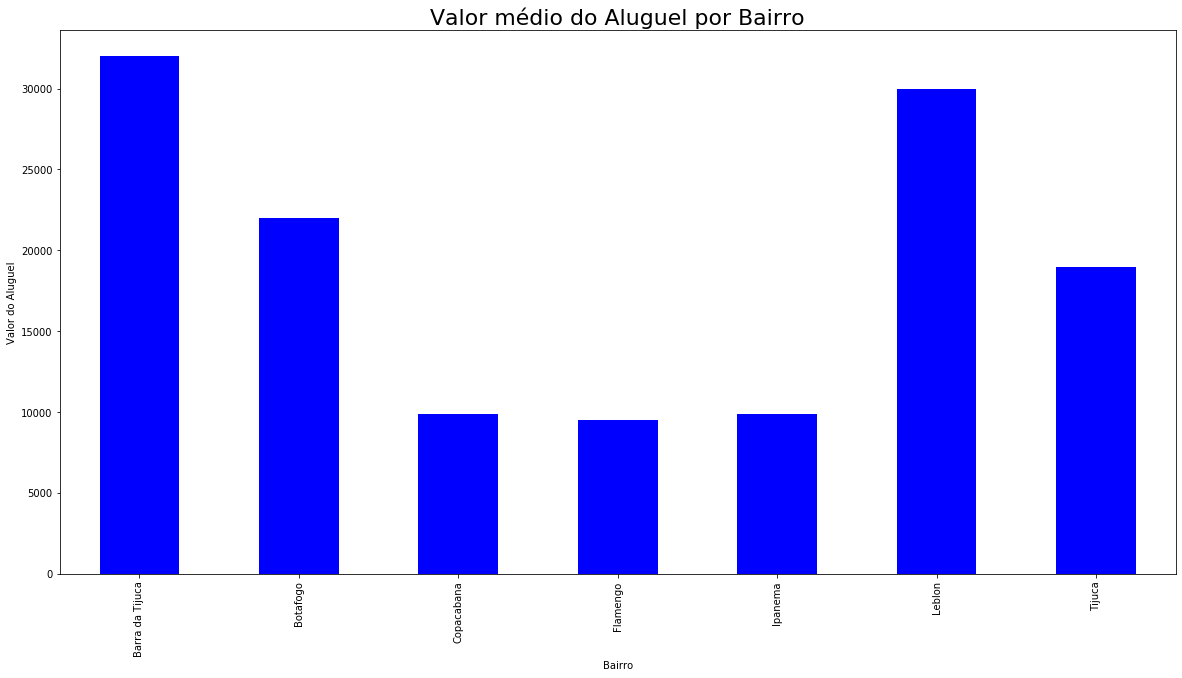

In [71]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'Blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do Aluguel por Bairro', {'fontsize': 22})